<hr>

## Tune Parameters: Window Size and Coefficient Ratio (p) Threshold

- In this notebook you can Inspect Tracks Individually and Tune Parameters
- Load an XML File containing trajectories and select a random track (i)
- min_track_len discards trajectories shorter than this value (in frames) when reading the XML file
- Tune the Confinement Ratio Threshold (p_thres) and the Rolling Window Size (w): peaks above the threshold suggest confinement
- Run the analysis for a Single Track using this p_thres and w: Check out the confined events in red.
- t_thres is the minimum time (in sec) a confined event needs to last to be consideredred

<hr>

### Read File

In [9]:
file = 'trajectories-examples/LA_Time_Lapse_23.06.2021_12_57_25_Exp3_51ms_p2_Tracks.xml'
min_track_len = 300

from bkg_func import main, utils, conf_ratio_func
all_tracks, frame_rate, n_tracks = main.ReadTracks(file, minlen = min_track_len)

32 tracks (filter = 300 frames)


### Track Selection

track with 345 steps


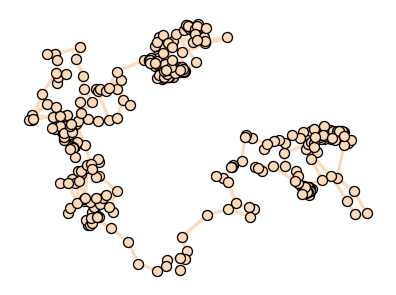

In [13]:
i = 32

track = utils.SingleTrack(all_tracks, i)
utils.plotSingleTrack(track)

### Tune Confinement Ratio Threshold and Rolling Window Size

rolling windows: [5, 8, 12] frames


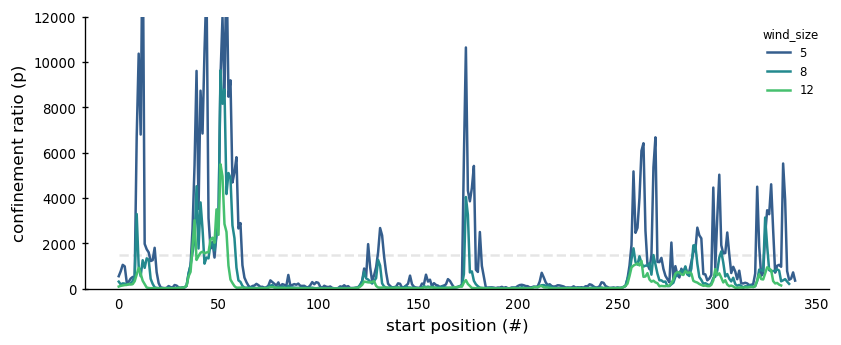

In [19]:
windows = [5, 8, 12]
p_thres = 1500

conf_ratios = conf_ratio_func.TuneConfinementThreshold(track, frame_rate, conf_thres = p_thres, windows = windows)
conf_ratio_func.PlotParameterTunnig(conf_ratios, thres = p_thres, ylim = 12000)

### Inspect Confined Region

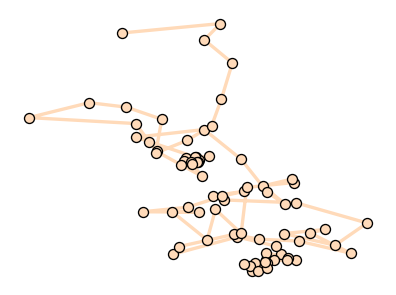

In [16]:
start_point = 125
end_point = 200

utils.plotSingleTrack(track, start = start_point, end = end_point)

## Subtrajectory Classification overview

track with 345 steps
time threshold: 10.0 frames ~ 0.5s
7 confined events; avg lifetime = 0.816s; avg cage_area = 16.9 nm2


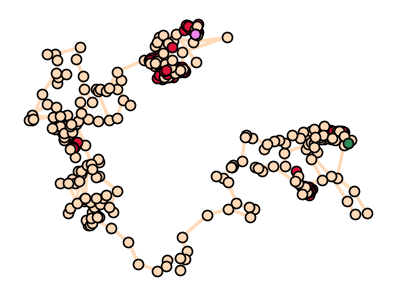

In [18]:
trackID = 32
p_thres = 500
t_thres = 0.5
window = 5

track_score, stats = main.TrajectoryClassification(all_tracks, trackID, p_thres, window, frame_rate, t_thres)

<hr>